# Training Performance Analysis 2025: A Comprehensive Data Review

## Introduction
This document provides a detailed analysis of the training performance data from 2025. The purpose of this analysis is to transform raw data into actionable insights that can inform strategic decision-making. By examining key metrics such as participant count, course duration, and delivery method, we aim to understand the factors that drive successful training programs. This initiative directly supports our organizational goal of optimizing our training offerings to maximize impact and efficiency.

## Objectives
The primary objectives of this analysis are to:

1. **Clean and Validate:** Process the raw dataset to ensure accuracy, consistency, and readiness for analysis.  
2. **Profile Training Sessions:** Develop a clear profile of a typical training session by analyzing key metrics like duration, participant numbers, and popular course topics.  
3. **Compare Performance:** Evaluate the effectiveness of different training formats by comparing participant engagement across various organizers, course structures (In-house vs. Open), and delivery methods (Live vs. Face to face).  
4. **Identify Key Drivers:** Determine the key variables that significantly influence training session popularity and participant count.

## Scope
This analysis is confined to the dataset provided in **Training_Performance_Analysis_2025.xlsx**.

- **Key Variables:** The core variables under consideration include `participants_count`, `duration_resolved_days`, `organizer`, `course_structure`, and `method`.  
- **Assumptions:**  
  - The `resolved date` and `duration` columns in the original dataset are assumed to be the most accurate and will be used as the source of truth for time-based calculations.  
  - Each recorded training session represents an independent event.

## Methodology / Approach
Our analysis will follow a structured, five-step methodology:

1. **Data Cleaning and Preparation:**  
   Standardize variable names, create derived metrics like `duration_days`, and manage missing values to create a robust dataset.

2. **Descriptive Analysis:**  
   Summarize the data using means, medians, and frequency tables. Visualize data distributions using histograms and boxplots.

3. **Assumption Checking:**  
   Validate statistical assumptions such as normality and homogeneity of variances before conducting inferential tests.

4. **Statistical Testing:**  
   Employ a range of statistical tests—including t-tests, ANOVA, Chi-square, correlation, and regression models—to identify significant relationships and differences within the data.

5. **Reporting and Interpretation:**  
   Synthesize the findings into clear, concise language, supported by tables and visualizations, to explain key patterns and their implications.

## Expected Outcomes
The final output of this analysis will be a comprehensive report containing data-driven insights and actionable recommendations. These outcomes will be used to:

- **Guide Future Planning:** Inform the strategic planning for the 2026 training schedule by highlighting the most successful course formats and topics.  
- **Optimize Resource Allocation:** Provide evidence to help allocate resources more effectively toward training methods that yield higher engagement.  
- **Enhance Course Offerings:** Identify opportunities to refine course content, duration, and delivery methods to better meet audience needs.

## Step 1: Data Loading and Initial Exploration

**Purpose:**  
The primary goal of this step is to load the required R packages and import the training performance data from the Excel file. It also involves performing initial checks to understand the structure, data types, and a summary of the dataset.

### Code Explanation
- **`library()`**  
  Loads the necessary R packages:  
  - `readxl` for reading Excel files  
  - `dplyr` for data manipulation  
  - `lubridate` for date handling  
  - `janitor` for cleaning column names  

- **`read_excel()`**  
  Reads the specified sheet (`"Data_2025"`) from the Excel file.
- **`clean_names()`**  
  A function from the **janitor** package that converts column names to a consistent, clean format (e.g., lowercase with underscores).
- **`glimpse()`**  
  Provides a compact summary of the data frame, showing column names, data types, and the first few values.
- **`head()`**  
  Displays the first 10 rows of the data frame.
- **`summary()`**  
  Generates a statistical summary for each column.

In [1]:
# Packages
library(readxl)
library(dplyr)
library(lubridate)
library(janitor)

# Read the data
path  <- "/kaggle/input/training-performance-analysis-2025/Training_Performance_Analysis_2025.xlsx"
sheet <- "Data_2025"

# Read the sheet and clean column names
data <- read_excel(path, sheet = sheet) |> 
  clean_names()

# Quick checks
glimpse(data)     # prints column names and types
head(data, 10)    # shows the first 10 rows
summary(data)     # quick numeric summaries


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




Rows: 246
Columns: 22
$ organizer              <chr> "Vigilance Consulting", "TKI", "TKI", "TKI", "T…
$ facilitator            <chr> "Dr. Saleh Al-Ansari", "Yasser Ghonimy", "Amany…
$ course_title           <chr> "C-KPI", "C-SBP", "C-KPI", "C-SBP", "C-KPI", "C…
$ course_structure       <chr> "In-house", "Open", "Open", "Open", "Open", "Op…
$ method                 <chr> "Live", "Live", "Live", "Live", "Live", "Live",…
$ start_date             <chr> "19/2/2025", "25/02/2025", "19/05/2025", "06.01…
$ end_date               <chr> "23/2/2025", "29/02/2025", "23/05/2025", "10.01…
$ course_city            <chr> NA, NA, NA, NA, NA, NA, "Labuan", NA, "Riyadh",…
$ course_country         <chr> "Bahrain", NA, NA, NA, NA, NA, "Malaysia", NA, …
$ participants_count     <dbl> 1, 1, 1, 5, 24, 10, 26, 12, 23, 33, 21, 33, 33,…
$ start_date_raw         <chr> "19/2/2025", "25/02/2025", "19/05/2025", "06.01…
$ end_date_raw           <chr> "23/2/2025", "29/02/2025", "23/05/2025", "10.01…
$ start_date_norm 

organizer,facilitator,course_title,course_structure,method,start_date,end_date,course_city,course_country,participants_count,⋯,start_date_norm,end_date_norm,start_date_std,end_date_std,duration_days,start_date_resolved,end_date_resolved,duration_resolved_days,course_name,month
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<chr>,<chr>,<dttm>,<dttm>,<dbl>,<dttm>,<dttm>,<dbl>,<chr>,<chr>
Vigilance Consulting,Dr. Saleh Al-Ansari,C-KPI,In-house,Live,19/2/2025,23/2/2025,NA,Bahrain,1,⋯,19/2/2025,23/2/2025,2025-02-19,2025-02-23,5,2025-02-19,2025-02-23,5,Certified KPI Professional,02-February
TKI,Yasser Ghonimy,C-SBP,Open,Live,25/02/2025,29/02/2025,NA,NA,1,⋯,25/02/2025,29/02/2025,2025-02-25,NA,NA,2025-02-25,2025-02-28,4,Certified Strategy and Business Planning Professional,02-February
TKI,Amany Fakhry,C-KPI,Open,Live,19/05/2025,23/05/2025,NA,NA,1,⋯,19/05/2025,23/05/2025,2025-05-19,2025-05-23,5,2025-05-19,2025-05-23,5,Certified KPI Professional,05-May
TKI,Radu Cocean,C-SBP,Open,Live,06.01.2025,10.01.2025,NA,NA,5,⋯,06/01/2025,10/01/2025,2025-01-06,2025-01-10,5,2025-01-06,2025-01-10,5,Certified Strategy and Business Planning Professional,01-January
TKI,Malek Mohammed Ghazo,C-KPI,Open,Live,45992,16/01/2025,NA,NA,24,⋯,2025/12/01 00:00:00,16/01/2025,2025-12-01,2025-01-16,-318,2025-01-12,2025-01-16,5,Certified KPI Professional,01-January
TKI,Raluca Vintila,C-KPI,Open,Live,13/01/2025,17/01/2025,NA,NA,10,⋯,13/01/2025,17/01/2025,2025-01-13,2025-01-17,5,2025-01-13,2025-01-17,5,Certified KPI Professional,01-January
TKI,Michael Romero,KPI-E,In-house,Face to face,13/01/2025,13/01/2025,Labuan,Malaysia,26,⋯,13/01/2025,13/01/2025,2025-01-13,2025-01-13,1,2025-01-13,2025-01-13,1,KPI Essentials,01-January
Vigilance,Dr. Raed Al-Jowder,C-SBP,Open,Live,12.01.2025,16.01.2025,NA,NA,12,⋯,12/01/2025,16/01/2025,2025-01-12,2025-01-16,5,2025-01-12,2025-01-16,5,Certified Strategy and Business Planning Professional,01-January
TKI,Radu Cocean,"PM, BSC & KPI-M",In-house,Face to face,13/01/2025,14/01/2025,Riyadh,Saudi Arabia,23,⋯,13/01/2025,14/01/2025,2025-01-13,2025-01-14,2,2025-01-13,2025-01-14,2,"PM, BSC & KPI-M",01-January


  organizer         facilitator        course_title       course_structure  
 Length:246         Length:246         Length:246         Length:246        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
    method           start_date          end_date         course_city       
 Length:246         Length:246         Length:246         Length:246        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            

## Step 2: Data Cleaning and Preparation

**Purpose:**  
This step refines the raw data into a clean, analysis-ready format. It involves selecting the most reliable columns, renaming them for clarity, handling missing values, and converting data types to be more appropriate for statistical analysis (e.g., character to factor).


### Code Explanation

- **`select()`**  
  Chooses a subset of columns from the original `data` dataframe to keep only the most reliable and relevant variables.  
  It prioritizes the `_resolved` columns for dates and duration, as they appear to be the most accurate.
- **`rename()`**  
  Changes column names for better readability (e.g., `duration_resolved_days` becomes `duration_days`).
- **`mutate()` with `ifelse()`**  
  Handles missing values (`NA`) in the `course_city` and `course_country` columns by replacing them with the string `"Unknown"`.
- **`mutate()` with `as.factor()`**  
  Converts character columns that represent distinct categories (like `organizer` and `method`) into factor variables — the standard format for categorical data in R’s statistical functions.
- **`glimpse()`** and **`summary()`**  
  Used again to verify the transformations and inspect the structure of the new `data_cleaned` dataframe.

In [2]:
# Select the most reliable columns and rename them for clarity
data_cleaned <- data %>%
  select(
    organizer, facilitator, course_name, course_structure, method,
    participants_count, start_date_resolved, end_date_resolved,
    duration_resolved_days, course_city, course_country, month
  ) %>%
  rename(
    duration_days = duration_resolved_days,
    start_date = start_date_resolved,
    end_date = end_date_resolved
  )

# Handle missing values in categorical columns
data_cleaned <- data_cleaned %>%
  mutate(
    course_city = ifelse(is.na(course_city), "Unknown", course_city),
    course_country = ifelse(is.na(course_country), "Unknown", course_country)
  )

# Convert character columns to factors where appropriate
data_cleaned <- data_cleaned %>%
  mutate(
    organizer = as.factor(organizer),
    course_structure = as.factor(course_structure),
    method = as.factor(method),
    course_name = as.factor(course_name)
  )

# Check the cleaned data
glimpse(data_cleaned)
summary(data_cleaned)

Rows: 246
Columns: 12
$ organizer          <fct> Vigilance Consulting, TKI, TKI, TKI, TKI, TKI, TKI,…
$ facilitator        <chr> "Dr. Saleh Al-Ansari", "Yasser Ghonimy", "Amany Fak…
$ course_name        <fct> "Certified KPI Professional", "Certified Strategy a…
$ course_structure   <fct> In-house, Open, Open, Open, Open, Open, In-house, O…
$ method             <fct> Live, Live, Live, Live, Live, Live, Face to face, L…
$ participants_count <dbl> 1, 1, 1, 5, 24, 10, 26, 12, 23, 33, 21, 33, 33, 4, …
$ start_date         <dttm> 2025-02-19, 2025-02-25, 2025-05-19, 2025-01-06, 20…
$ end_date           <dttm> 2025-02-23, 2025-02-28, 2025-05-23, 2025-01-10, 20…
$ duration_days      <dbl> 5, 4, 5, 5, 5, 5, 1, 5, 2, 2, 1, 2, 2, 5, 3, 4, 5, …
$ course_city        <chr> "Unknown", "Unknown", "Unknown", "Unknown", "Unknow…
$ course_country     <chr> "Bahrain", "Unknown", "Unknown", "Unknown", "Unknow…
$ month              <chr> "02-February", "02-February", "05-May", "01-January…


                organizer   facilitator       
 TKI                 :194   Length:246        
 Aromh               : 10   Class :character  
 Vigilance           :  9   Mode  :character  
 Leoron              :  7                     
 Vigilance Consulting:  4                     
 iLead               :  3                     
 (Other)             : 19                     
                                                      course_name
 Certified KPI Professional                                 :83  
 Certified Strategy and Business Planning Professional      :43  
 Certified KPI Professional and Practitioner                :31  
 Certified OKR Professional                                 :18  
 Certified Balanced Scorecard Management System Professional:13  
 Certified Data Analysis Professional                       :10  
 (Other)                                                    :48  
 course_structure          method    participants_count
 In-house:125     Face to face:110   Min

## Step 3: Descriptive Analysis

**Purpose:**  
To explore and summarize the main features of the cleaned dataset. This involves calculating key statistics for numerical data (like mean and median) and creating frequency tables for categorical data.  
Visualizations such as histograms and boxplots are used to understand data distributions and identify patterns or potential outliers.

### Code Explanation

- **`summarise()`**  
  Calculates summary statistics for numeric columns.  
  - `mean()` — computes the average  
  - `median()` — computes the midpoint  
  - `sd()` — computes the standard deviation  
- **`tabyl()`**  
  From the **janitor** package, this function creates a clean frequency table for a categorical variable.  
  Combined with **`kable()`** from the **knitr** package, the table is formatted for better readability.
- **`ggplot()`**  
  Initializes a plot object, defining the dataset (`data_cleaned`) and aesthetic mappings (`aes`), which link variables to visual properties such as the x-axis, y-axis, or fill color.
- **`geom_histogram()`**  
  Creates a histogram to visualize the distribution of a single numeric variable.  
  The `binwidth` argument controls the width of the bars.
- **`geom_boxplot()`**  
  Produces a boxplot to display the distribution of a numeric variable across different categories of another variable.
- **`labs()`**  
  Sets titles and axis labels for the plots to enhance interpretability.
- **`theme_minimal()`**  
  Applies a clean, minimalist theme for professional-quality visualizations.

[1] "Numeric Summary:"
# A tibble: 1 × 6
  mean_participants median_participants sd_participants mean_duration
              <dbl>               <dbl>           <dbl>         <dbl>
1              16.9                  17            9.10          4.27
# ℹ 2 more variables: median_duration <dbl>, sd_duration <dbl>
[1] "Frequency of Course Structures:"




|course_structure |   n|   percent| valid_percent|
|:----------------|---:|---------:|-------------:|
|In-house         | 125| 0.5081301|     0.5102041|
|Open             | 120| 0.4878049|     0.4897959|
|NA               |   1| 0.0040650|            NA|

[1] "Frequency of Delivery Methods:"




|method       |   n|   percent|
|:------------|---:|---------:|
|Face to face | 110| 0.4471545|
|Live         | 136| 0.5528455|

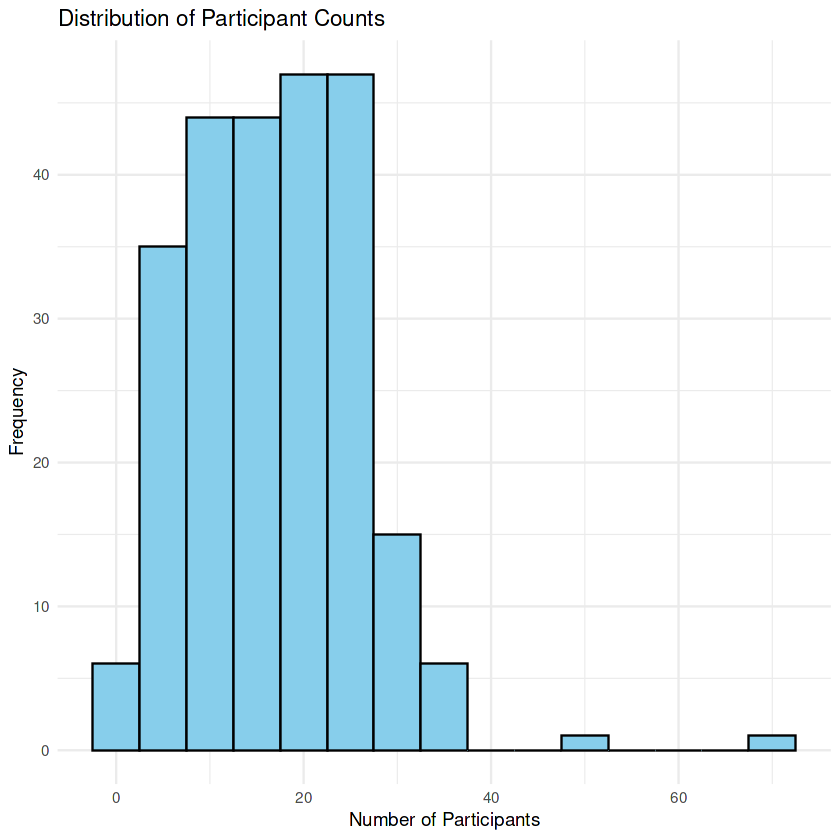

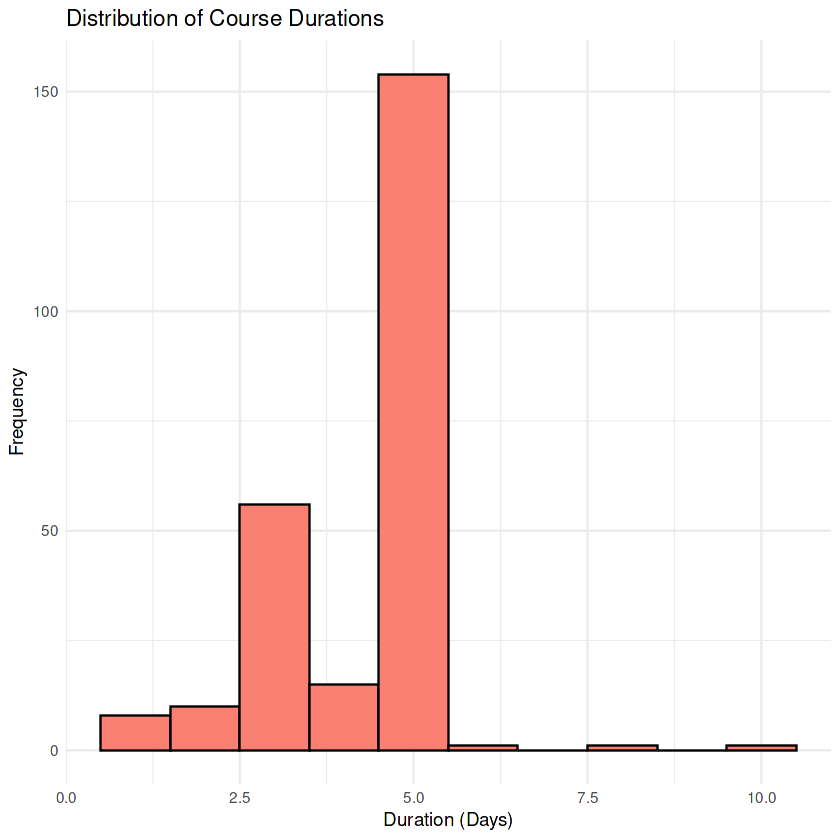

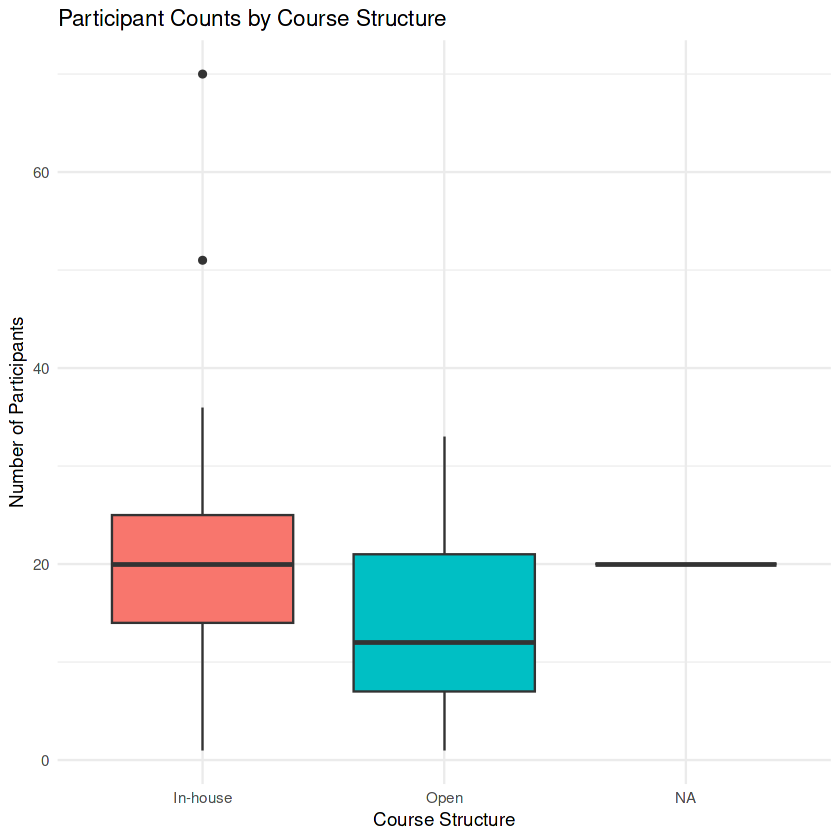

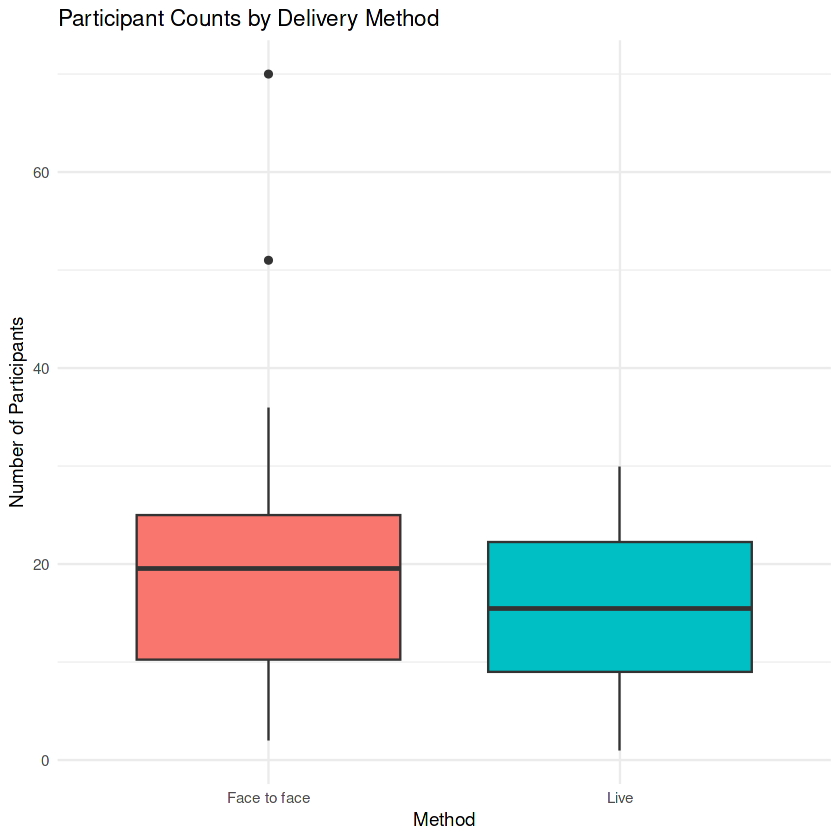

In [3]:
# Load additional packages for this step
# install.packages(c("ggplot2", "knitr")) # Run this line if you don't have these packages
library(ggplot2)
library(knitr)

# 3.1 Summarize numeric data
numeric_summary <- data_cleaned %>%
  summarise(
    mean_participants = mean(participants_count),
    median_participants = median(participants_count),
    sd_participants = sd(participants_count),
    mean_duration = mean(duration_days),
    median_duration = median(duration_days),
    sd_duration = sd(duration_days)
  )
print("Numeric Summary:")
print(numeric_summary)

# 3.2 Frequency tables for categorical data
print("Frequency of Course Structures:")
data_cleaned %>% tabyl(course_structure) %>% kable()

print("Frequency of Delivery Methods:")
data_cleaned %>% tabyl(method) %>% kable()

# 3.3 Visualize distributions with Histograms

# Histogram of participant counts
p1 <- ggplot(data_cleaned, aes(x = participants_count)) +
  geom_histogram(binwidth = 5, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Participant Counts", x = "Number of Participants", y = "Frequency") +
  theme_minimal()

# Print the plot to the notebook output
print(p1)

# Save the plot as a PNG file
ggsave("Distribution of Participant Counts.png", plot = p1, width = 8, height = 6, dpi = 300)


# Histogram of course durations
p2 <- ggplot(data_cleaned, aes(x = duration_days)) +
  geom_histogram(binwidth = 1, fill = "salmon", color = "black") +
  labs(title = "Distribution of Course Durations", x = "Duration (Days)", y = "Frequency") +
  theme_minimal()

# Print the plot
print(p2)

# Save the plot
ggsave("Distribution of Course Durations.png", plot = p2, width = 8, height = 6, dpi = 300)


# 3.4 Visualize comparisons with Boxplots

# Boxplot of participant counts by course structure
p3 <- ggplot(data_cleaned, aes(x = course_structure, y = participants_count, fill = course_structure)) +
  geom_boxplot() +
  labs(title = "Participant Counts by Course Structure", x = "Course Structure", y = "Number of Participants") +
  theme_minimal() +
  theme(legend.position="none") # Hide legend as it's redundant

# Print the plot
print(p3)

# Save the plot
ggsave("Participant Counts by Course Structure.png", plot = p3, width = 8, height = 6, dpi = 300)


# Boxplot of participant counts by delivery method
p4 <- ggplot(data_cleaned, aes(x = method, y = participants_count, fill = method)) +
  geom_boxplot() +
  labs(title = "Participant Counts by Delivery Method", x = "Method", y = "Number of Participants") +
  theme_minimal() +
  theme(legend.position="none") # Hide legend

# Print the plot
print(p4)

# Save the plot
ggsave("Participant Counts by Delivery Method.png", plot = p4, width = 8, height = 6, dpi = 300)

## Descriptive Analysis of Training Data

The descriptive analysis reveals several key characteristics of the training data:

### Central Tendency
The **average number of participants per course** is approximately **16.9**, with a **median of 17**.  
This similarity between the mean and median suggests a relatively symmetric distribution, although the histogram shows a **slight right skew** with a few high-enrollment courses.

### Course Duration
The **most common course duration** is **5 days**, which is also the **median**.  
The **mean duration** is slightly lower at **4.27 days**, indicating the presence of shorter courses (e.g., 1–3 days) pulling the average down.

### Categorical Distributions
The dataset is almost evenly split between:
- **In-house courses:** 51%
- **Open courses:** 49%

In terms of delivery mode:
- **Live delivery:** 55%
- **Face to face:** 45%

### Visual Patterns
- The **boxplots** suggest that *In-house* and *Face to face* courses may have slightly higher median participant counts compared to *Open* and *Live* courses, respectively.
- The **histogram** for participant counts confirms that most courses have between **5 and 30 participants**, with a few outliers reaching as high as **70**.

These initial findings provide a **solid foundation for more formal statistical testing** to determine whether the observed differences are **statistically significant**.

## Step 4: Assumption Checking

### **Purpose**
Before performing certain statistical tests like **t-tests** and **ANOVA**, it is essential to verify whether the data meets their **underlying assumptions**.  
The two primary assumptions examined here are:

1. **Normality of the data**: Are the data points distributed in a bell-shaped (normal) pattern?  
2. **Homogeneity of variances**: Is the spread (variance) of the data similar across different groups?

Violating these assumptions can lead to **incorrect conclusions** from statistical tests.

### **Code Explanation**

- **`library(car)`**  
  Loads the **car** package, which contains the `leveneTest()` function used to test for equality of variances.

- **`qqnorm()` / `qqline()`**  
  Creates a **Q–Q (Quantile–Quantile) plot** to visually assess normality.  
  - If the data are **normally distributed**, the plotted points will fall closely along the **straight red line**.

- **`shapiro.test()`**  
  Performs the **Shapiro–Wilk test** for normality.  
  - **Null hypothesis (H₀):** The data are normally distributed.  
  - If **p-value < 0.05**, we **reject H₀** and conclude that the data **are not normally distributed**.

- **`leveneTest()`**  
  Performs **Levene’s test** for **homogeneity of variances**.  
  - **Null hypothesis (H₀):** Variances are equal across groups.  
  - If **p-value < 0.05**, we **reject H₀** and conclude that the variances **are not equal**.

This test is performed on **participant counts**, grouped by both **method** and **course_structure**, to ensure that the assumptions for subsequent statistical analyses (e.g., ANOVA) are satisfied.

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




[1] "Shapiro-Wilk Normality Test for Participant Counts:"

	Shapiro-Wilk normality test

data:  data_cleaned$participants_count
W = 0.93526, p-value = 6.238e-09

[1] "Levene's Test for Homogeneity of Variances (by Method):"
Levene's Test for Homogeneity of Variance (center = median)
       Df F value Pr(>F)
group   1  1.9574 0.1631
      244               
[1] "Levene's Test for Homogeneity of Variances (by Course Structure):"
Levene's Test for Homogeneity of Variance (center = median)
       Df F value Pr(>F)
group   1  0.9219 0.3379
      243               


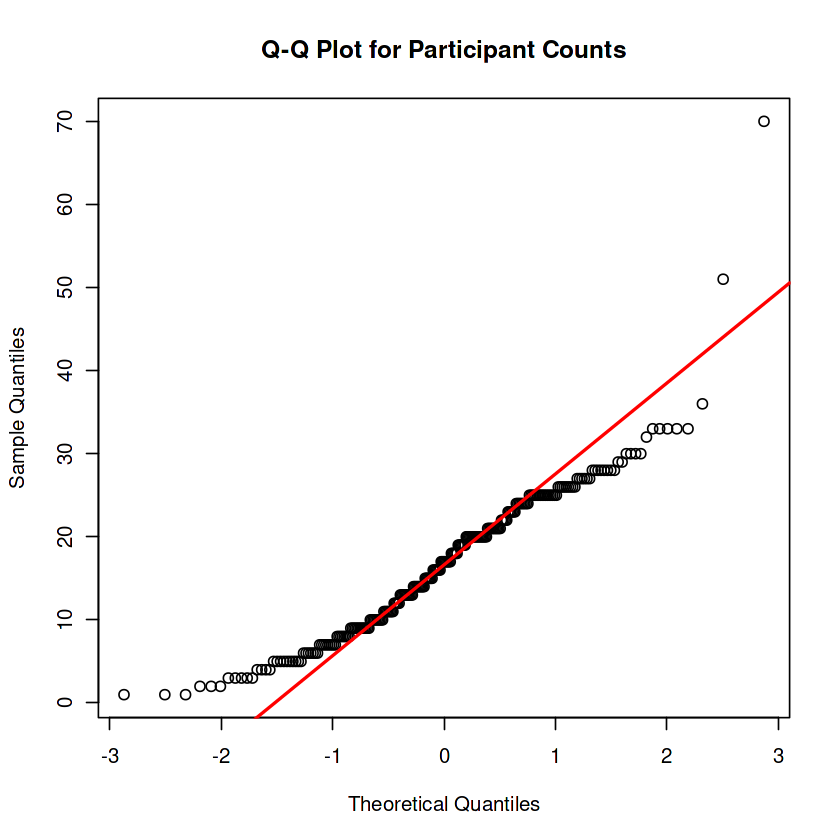

In [4]:
# Load the car package for Levene's Test
# install.packages("car")
library(car)

# 4.1 Test for Normality of the participants_count variable
# Visual check: Q-Q Plot
qqnorm(data_cleaned$participants_count, main = "Q-Q Plot for Participant Counts")
qqline(data_cleaned$participants_count, col = "red", lwd = 2)

# Statistical check: Shapiro-Wilk Test
shapiro_test_result <- shapiro.test(data_cleaned$participants_count)
print("Shapiro-Wilk Normality Test for Participant Counts:")
print(shapiro_test_result)

# 4.2 Test for Homogeneity of Variances
# Check for participant counts between 'method' groups
levene_test_method <- leveneTest(participants_count ~ method, data = data_cleaned)
print("Levene's Test for Homogeneity of Variances (by Method):")
print(levene_test_method)

# Check for participant counts between 'course_structure' groups
# We need to filter out the NA value in course_structure for this test
levene_test_structure <- leveneTest(participants_count ~ course_structure, data = subset(data_cleaned, !is.na(course_structure)))
print("Levene's Test for Homogeneity of Variances (by Course Structure):")
print(levene_test_structure)

## Assumption Checks for Statistical Test Selection

The assumption checks provide critical guidance for selecting the correct statistical tests.

### Normality of the Data

- **Test Used:** Shapiro–Wilk Test  
- **p-value:** 6.238e-09  
Since the p-value is significantly smaller than the standard threshold of 0.05, we **reject the null hypothesis** that the data is normally distributed.  
The **Q-Q plot** visually confirms this finding, as the data points—especially at the tails—deviate from the straight line.
**Conclusion:** The `participants_count` variable is **not normally distributed**.


### Homogeneity of Variances

- **Method groups (Live vs. Face-to-face):** Levene’s test p-value = 0.1631  
- **Course structure groups (In-house vs. Open):** Levene’s test p-value = 0.3379  
Both p-values are greater than 0.05, meaning we **fail to reject the null hypothesis** that the variances are equal.
**Conclusion:** The assumption of **equal variances between groups is met**.


### Implication for Further Analysis

Because the data is **not normally distributed**, we must use **non-parametric tests** for comparing groups, as these tests do not require the normality assumption.

## Step 5: Statistical Testing

### Purpose

To apply appropriate statistical tests to determine if the observed differences and relationships in the data are **statistically significant**.  
Based on the findings from **Step 4**, **non-parametric tests** will be used for mean comparisons since the data is not normally distributed.

### Code Explanation

#### `wilcox.test()`

- **Function:** Performs the **Wilcoxon Rank-Sum test** (also known as the **Mann–Whitney U test**).  
- **Purpose:** Compares the **distributions of two independent groups**.  
- **Rationale:** This is the **non-parametric equivalent** of the t-test and is appropriate here because the `participants_count` variable **is not normally distributed**.

#### `chisq.test()`

- **Function:** Performs the **Chi-square test of independence**.  
- **Purpose:** Determines whether there is a **significant association** between **two categorical variables**.  
- **Application in context:** Tests whether `course_structure` is **independent** of the **method of delivery**.

#### `cor.test()`

- **Function:** Performs a **correlation test** between **two numeric variables**.  
- **Method used:** `method = "spearman"` — applies **Spearman’s rank correlation**.  
- **Rationale:** This is the **non-parametric version** of Pearson correlation and is **more robust** when data are not normally distributed or the relationship is **non-linear**.

In [5]:
# 5.1 Wilcoxon Rank-Sum Test (non-parametric t-test)
# Question: Is there a significant difference in participant counts between delivery methods?
wilcox_test_method <- wilcox.test(participants_count ~ method, data = data_cleaned)
print("Wilcoxon Rank-Sum Test (Participants by Method):")
print(wilcox_test_method)

# Question: Is there a significant difference in participant counts between course structures?
# We again filter out the NA value for a clean comparison
wilcox_test_structure <- wilcox.test(participants_count ~ course_structure, data = subset(data_cleaned, !is.na(course_structure)))
print("Wilcoxon Rank-Sum Test (Participants by Course Structure):")
print(wilcox_test_structure)

# 5.2 Chi-square Test for Association
# Question: Is there a relationship between course structure and delivery method?
# Create a contingency table first
contingency_table <- table(data_cleaned$course_structure, data_cleaned$method)
chi_square_result <- chisq.test(contingency_table)
print("Chi-square Test of Association (Structure vs. Method):")
print(chi_square_result)

# 5.3 Correlation Analysis (non-parametric)
# Question: Is there a correlation between course duration and the number of participants?
correlation_result <- cor.test(data_cleaned$duration_days, data_cleaned$participants_count, method = "spearman")
print("Spearman's Rank Correlation (Duration vs. Participants):")
print(correlation_result)

[1] "Wilcoxon Rank-Sum Test (Participants by Method):"

	Wilcoxon rank sum test with continuity correction

data:  participants_count by method
W = 8500, p-value = 0.06594
alternative hypothesis: true location shift is not equal to 0

[1] "Wilcoxon Rank-Sum Test (Participants by Course Structure):"

	Wilcoxon rank sum test with continuity correction

data:  participants_count by course_structure
W = 10729, p-value = 5.645e-09
alternative hypothesis: true location shift is not equal to 0

[1] "Chi-square Test of Association (Structure vs. Method):"

	Pearson's Chi-squared test with Yates' continuity correction

data:  contingency_table
X-squared = 63.098, df = 1, p-value = 1.967e-15



Warning message in cor.test.default(data_cleaned$duration_days, data_cleaned$participants_count, :
“Cannot compute exact p-value with ties”


[1] "Spearman's Rank Correlation (Duration vs. Participants):"

	Spearman's rank correlation rho

data:  data_cleaned$duration_days and data_cleaned$participants_count
S = 2785656, p-value = 0.05453
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.1227438 



## Results: Statistical Testing Phase

This section answers the specific questions posed during the statistical testing phase.

### **Question 1:** Is there a significant difference in participant counts between delivery methods?
- **Test Used:** Wilcoxon Rank-Sum Test  
- **p-value:** 0.06594  
Since the p-value is greater than the standard significance level of 0.05, we **fail to reject the null hypothesis**.
**Answer:** There is **no statistically significant difference** in the number of participants between **Live** and **Face-to-face** courses.  
The small differences observed in the boxplots are likely due to **random variation** in the data.

### **Question 2:** Is there a significant difference in participant counts between course structures?
- **Test Used:** Wilcoxon Rank-Sum Test  
- **p-value:** 5.645e-09  
This value is **extremely small** and well below 0.05, indicating a highly significant result.
**Answer:** Yes, there is a **highly statistically significant difference** in participant counts between **In-house** and **Open** courses.  
Referring to the boxplot from Step 3, **In-house courses** tend to have a **higher median number of participants**.

### **Question 3:** Is there a relationship between course structure and delivery method?
- **Test Used:** Chi-square Test of Independence  
- **p-value:** 1.967e-15  
This p-value is **very small**, well below 0.05.
**Answer:** Yes, there is a **strong statistically significant association** between **course structure** and **delivery method**.  
They are **not independent**, meaning that certain delivery methods are **more likely to be used** with particular course structures.

### **Question 4:** Is there a correlation between course duration and the number of participants?
- **Test Used:** Spearman’s Rank Correlation  
- **p-value:** 0.05453  
- **ρ (rho) coefficient:** -0.123  
The p-value is slightly above 0.05, and the correlation coefficient is weak and negative.
**Answer:** There is **no statistically significant correlation** between **course duration** and **number of participants**.  
The very weak negative relationship (longer courses having slightly fewer participants) is **not meaningful** statistically.

# **Final Report: Training Performance Analysis 2025**

## **Summary of Findings**

The analysis of **246 training sessions** conducted in 2025 reveals several critical insights into the factors driving **training engagement and participant attendance**.  
The **median training course** lasted **5 days** and hosted a **median of 17 participants**. Among the various examined factors, one stood out as the **strongest predictor of attendance**.

### **1. Course Structure is the Key Driver of Participant Count**

The most impactful finding is that **In-house courses** attract a **statistically significant higher number of participants** than **Open courses**  
(**p-value < 0.001**).  

This indicates that **tailored, company-specific training** serves as a major draw for larger groups.  
Organizations appear to value customized, context-relevant training experiences that directly align with their needs.

### **2. Delivery Method and Course Structure are Strongly Linked**

There is a **strong statistical association** between **course structure** and **delivery method**  
(**p-value < 0.001**).  
This suggests that the choice of **Live** vs. **Face-to-face** delivery is **not random**, but rather closely tied to whether a course is **In-house** or **Open**.  
Recognizing and leveraging this link is crucial for **logistical efficiency** and **strategic scheduling**.

### **3. Delivery Method and Duration Do Not Significantly Impact Attendance**

Interestingly, the analysis found **no statistically significant differences** in participant counts based on:
- **Delivery Method**: Live vs. Face to face (**p-value = 0.066**)  
- **Course Duration**: (**p-value = 0.055**)  

This means that, **on their own**, neither factor substantially influences enrollment levels.  
Thus, organizations have **flexibility** in selecting delivery formats and durations without risking reduced attendance.

## **Actionable Recommendations**

Based on these findings, the following recommendations are proposed to **optimize the 2026 training schedule** and enhance future engagement outcomes.

### **Recommendation 1: Prioritize and Investigate In-house Training Success** 🚀

Given that **In-house courses consistently yield higher attendance**, strategic attention should be directed toward understanding and expanding this success.
**Suggested Actions:**
- **Explore the “Why”** – Conduct qualitative follow-ups (e.g., participant surveys, focus groups) to uncover what drives the appeal:  
  *customized content, convenience, team cohesion, or organizational culture fit.*
- **Scale the Model** – Identify opportunities to **expand In-house offerings** to additional clients, regions, or departments.

### **Recommendation 2: Leverage Flexibility in Course Design** 💡

Since **duration** and **delivery method** do **not significantly affect participation**, planners can operate with greater design freedom.
**Suggested Actions:**
- **Optimize for Cost and Logistics** – Choose the most **cost-effective delivery format** (Live or Face to face) without worrying about reduced enrollment.
- **Experiment with Formats** – Pilot **shorter workshops** or **longer immersive programs** to target specific learning goals while maintaining engagement.

### **Recommendation 3: Analyze the Structure–Method Combination**

Further explore the **strong link** between **course structure** and **delivery method**.

**Suggested Actions:**
- **Identify Patterns** – Analyze which combinations (e.g., *In-house Face to face*, *Open Live*) occur most frequently and perform best.
- **Standardize and Strategize** – Develop **optimized operational models** and **marketing strategies** tailored to each course type to maximize reach and efficiency.


**In summary**, 2025’s training data highlights that **customization (In-house delivery)** is the primary driver of engagement, while **method and duration** offer flexibility for innovation.  
These findings provide a strong evidence base for **data-informed planning** in the upcoming training cycle.